# Run the whole deltas algorithm

In [162]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pipeline
import deltas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data and classifier

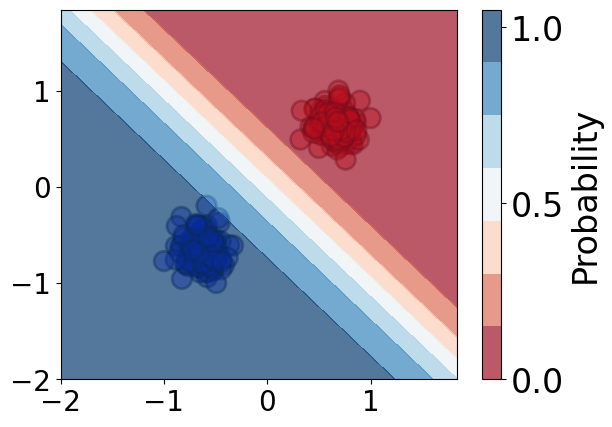

In [163]:
N1 = 100
N2 = 100
data_clf = pipeline.get_data_and_classifier(N1=N1, N2=N2)

data = data_clf['data']
clf = data_clf['clf']
m1 = data_clf['mean1']
m2 = data_clf['mean2']

## Get projection and data we need (R, D, M etc.)

R1 empirical: 0.35707603306098046
R2 empirical: 0.3522050251183577


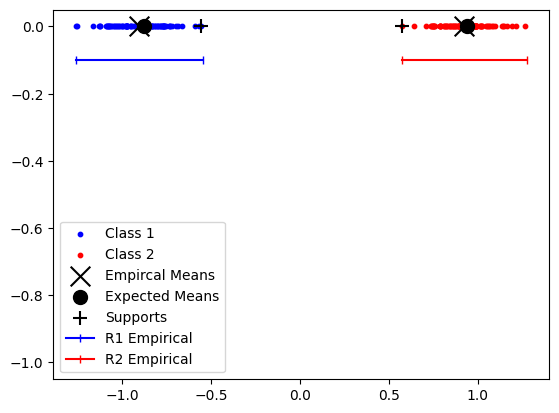

In [164]:
data_info = pipeline.data_project_and_info(
    data=data_clf['data'], m1=data_clf['mean1'], m2=data_clf['mean2'], clf=data_clf['clf'], data_test=data_clf['data_test'])

## set up extra parameters

In [165]:
# Costs
data_info['c1'] = 1
data_info['c2'] = 1
data_info['N1'] = N1
data_info['N2'] = N2
pipeline.print_params(data_info)

Parameters
        R:  1.2666115454716365
        N1: 100
        N2: 100
        R1: 0.35707603306098046
        R2: 0.3522050251183577
        M:  1.129889174969584
        D:  1.8271034461519422
        C1: 1
        C2: 1


## Optimiser

-----------
optimising init deltas wrt. contraint
min: 5.147265447202898e-06
deltas init found: 1.0, 0.91838413420983
contraint 3.224053468642296e-09
-----------


/home/matt/projects/linear_confidence/radius.py:11: RuntimeWarning: divide by zero encountered in divide
  error = (R_sup/np.sqrt(N)) * (2 + (np.sqrt( 2*np.log(1/delta) )))


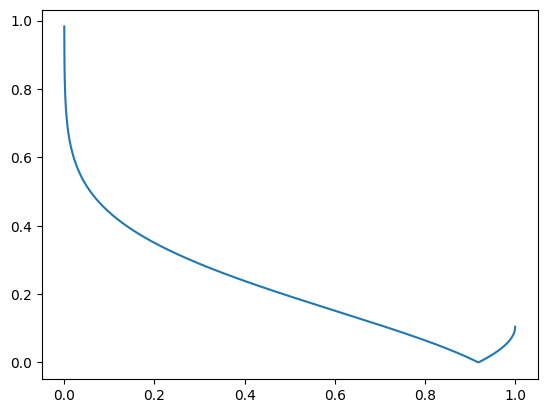

constraint init: 3.224053468642296e-09 should equal 0
delta1 : 1.0 
delta2: 0.91838413420983
constraint: 3.224053468642296e-09 should equal 0
R1_est : 0.863720651249635 
R2_est: 0.8588496433070123 
D_emp: 1.8271034461519422


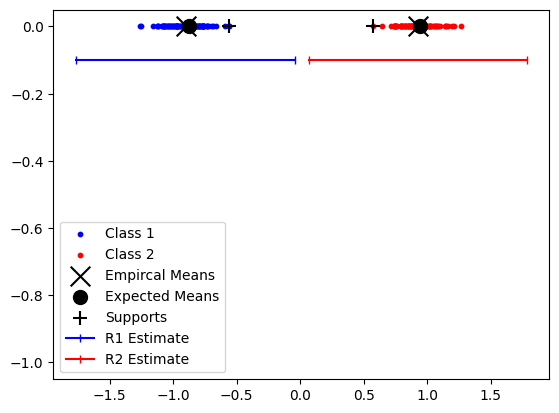

In [166]:

loss_func = deltas.scipy_optim_func   # returns tuple for (loss_func, gradient)
loss_func = deltas.loss_one_delta   # loss_func only - won't use gradient during optimisation
loss_func = lambda delta, data_info: deltas.loss(delta[0], delta[1], data_info)

contraint_func = deltas.contraint_eq7
# contraint_func = deltas.contraint_eq8
 
delta1, delta2 = pipeline.optimise(
    data_info, loss_func, contraint_func, num_deltas=2)

# Evaluation on test data

In [167]:
pipeline.eval_test(data_clf, data_info, delta1, delta2)

original accuracy: 1.0
deltas   accuracy: 1.0


In [168]:
import radius
N1 = data_info['N1']
N2 = data_info['N2']
R1_emp = data_info['empirical R1']
R2_emp = data_info['empirical R2']
R = data_info['R all data']
D_emp = data_info['empirical D']

delta1 = 1
delta2 = 0.1
R1_est = radius.R_upper_bound(R1_emp, R, N1, delta1)
R2_est = radius.R_upper_bound(R2_emp, R, N2, delta2)

print(R1_est)
print(R2_est)
print(D_emp)

0.863720651249635
1.4024707123246076
1.8271034461519422


In [169]:
bounds = [[0, 0], [1, 1]]
delta_linspace = 10
delta1s = np.linspace(bounds[0][0], bounds[1][0], delta_linspace)
delta2s = np.linspace(bounds[0][1], bounds[1][1], delta_linspace)

NameError: name 'bounds' is not defined